In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.losses import mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard
import numpy as np

2024-02-27 00:25:21.837326: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 00:25:21.837355: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 00:25:21.838401: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-27 00:25:21.844931: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-27 00:25:22.674262: W tensorflow/compiler/tf2

In [2]:
# sample Data
celcius = np.array([-10, 0,60,62,64,66,68,70,72,74], dtype = float)
fahrenheit = np.array([14,32,140, 143.6, 147.2, 150.8, 154.4, 158, 161.6, 165.2], dtype = float)

In [3]:
# single model
model = keras.Sequential([
    layers.Dense(units=4, input_shape=[1], activation='relu'),
    layers.Dense(units=3, activation='relu'), 
    layers.Dense(units=1) 
])

In [4]:
# compile model 
model.compile(optimizer=keras.optimizers.Adam(0.01), loss='mean_squared_error')
# model.compile(optimizer='sgd', loss='mean_squared_error')

In [5]:
# tensorboard
tensorboard_callback = TensorBoard(log_dir='./logs')
# Run command
# tensorboard --logdir=./logs

In [6]:
# train model 
history = model.fit(celcius, fahrenheit, epochs=300, verbose=1, callbacks=[tensorboard_callback])

Epoch 1/300
1/1 [==============================] - 0s 472ms/step - loss: 21207.4355
Epoch 2/300
1/1 [==============================] - 0s 6ms/step - loss: 21057.2266
Epoch 3/300
1/1 [==============================] - 0s 8ms/step - loss: 20887.0566
Epoch 4/300
1/1 [==============================] - 0s 6ms/step - loss: 20721.2441
Epoch 5/300
1/1 [==============================] - 0s 7ms/step - loss: 20556.5273
Epoch 6/300
1/1 [==============================] - 0s 6ms/step - loss: 20396.1914
Epoch 7/300
1/1 [==============================] - 0s 7ms/step - loss: 20241.5508
Epoch 8/300
1/1 [==============================] - 0s 7ms/step - loss: 20093.2090
Epoch 9/300
1/1 [==============================] - 0s 8ms/step - loss: 19951.4688
Epoch 10/300
1/1 [==============================] - 0s 8ms/step - loss: 19816.4629
Epoch 11/300
1/1 [==============================] - 0s 8ms/step - loss: 19688.2109
Epoch 12/300
1/1 [==============================] - 0s 6ms/step - loss: 19566.6562
Epoch 13/30

In [7]:
for epoch, loss in enumerate(history.history['loss']):
    print(f"Epoch {epoch+1}/{300}, Loss: {loss:.4f}")

Epoch 1/300, Loss: 21207.4355
Epoch 2/300, Loss: 21057.2266
Epoch 3/300, Loss: 20887.0566
Epoch 4/300, Loss: 20721.2441
Epoch 5/300, Loss: 20556.5273
Epoch 6/300, Loss: 20396.1914
Epoch 7/300, Loss: 20241.5508
Epoch 8/300, Loss: 20093.2090
Epoch 9/300, Loss: 19951.4688
Epoch 10/300, Loss: 19816.4629
Epoch 11/300, Loss: 19688.2109
Epoch 12/300, Loss: 19566.6562
Epoch 13/300, Loss: 19451.6855
Epoch 14/300, Loss: 19343.1367
Epoch 15/300, Loss: 19240.7949
Epoch 16/300, Loss: 19144.4121
Epoch 17/300, Loss: 19053.6914
Epoch 18/300, Loss: 18968.3008
Epoch 19/300, Loss: 18887.8613
Epoch 20/300, Loss: 18811.9551
Epoch 21/300, Loss: 18748.3809
Epoch 22/300, Loss: 18745.3672
Epoch 23/300, Loss: 18742.3340
Epoch 24/300, Loss: 18739.3008
Epoch 25/300, Loss: 18736.2559
Epoch 26/300, Loss: 18733.1992
Epoch 27/300, Loss: 18730.1250
Epoch 28/300, Loss: 18727.0410
Epoch 29/300, Loss: 18723.9473
Epoch 30/300, Loss: 18720.8398
Epoch 31/300, Loss: 18717.7246
Epoch 32/300, Loss: 18714.5996
Epoch 33/300, Los

In [8]:
new_celcius = [61,63,65,67,69]
new_fahrenheit = [141.8,145.4,149,152.6,156.2]

In [9]:
celcius_test = np.array(new_celcius, dtype = float)
new_tamperture_predict = model.predict(celcius_test)

1/1 [==============================] - 0s 64ms/step


In [10]:
# prediction output
for n_d, n_t_f, n_t_p in zip(new_celcius, new_fahrenheit, new_tamperture_predict):
    print(f"Data: {n_d} True temperature:{n_t_f:.2f}, Predicted temperature: {n_t_p[0]:.2f} ")

Data: 61 True temperature:141.80, Predicted temperature: 141.10 
Data: 63 True temperature:145.40, Predicted temperature: 144.97 
Data: 65 True temperature:149.00, Predicted temperature: 148.84 
Data: 67 True temperature:152.60, Predicted temperature: 152.71 
Data: 69 True temperature:156.20, Predicted temperature: 156.58 


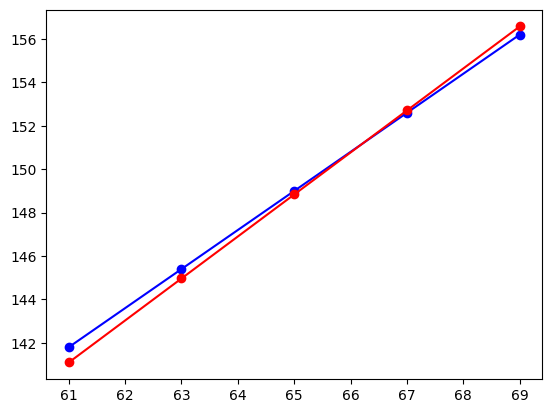

In [11]:
plt.plot(new_celcius, new_fahrenheit, color = 'blue', marker = 'o', label = 'data point')
plt.plot(celcius_test, new_tamperture_predict, color = 'red', marker = 'o', label = 'predict point')
plt.show()